### Elevated Big Mart Sales Prediction through Strategic Implementation of Random Forest Classifier and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pylab import rcParams

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
rcParams['figure.figsize']=[7,6]  # width,height

In [5]:
df_sales=pd.read_csv('k_circle_sales.csv')

In [6]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df_sales.shape

(8523, 12)

In [8]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
df_sales['Item_Weight'].mean()

12.857645184135976

In [11]:
df_sales['Item_Weight'].median()

12.6

In [12]:
df_sales['Item_Weight'].mode()

0    12.15
Name: Item_Weight, dtype: float64

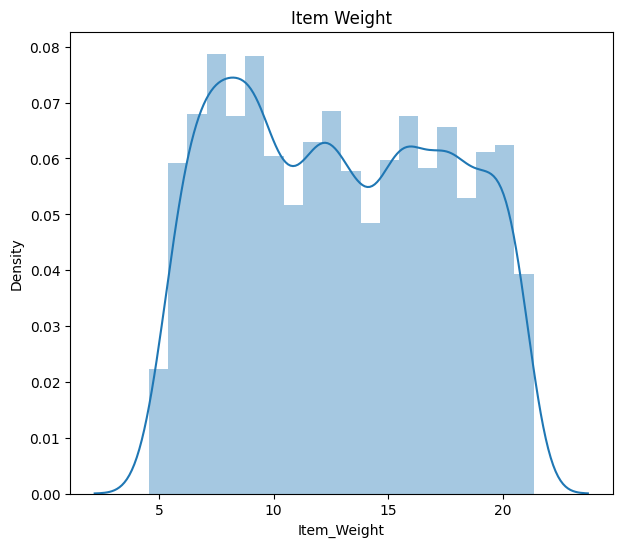

In [13]:
sns.distplot(df_sales['Item_Weight'])   # it put into percentage format
plt.title('Item Weight')
plt.show()

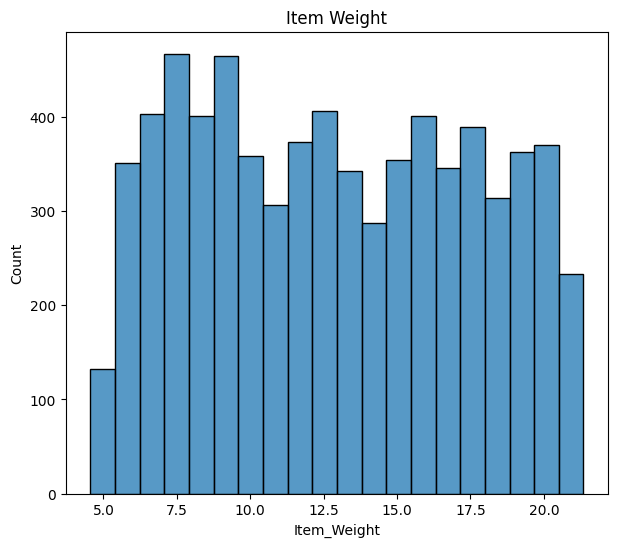

In [14]:
sns.histplot(df_sales['Item_Weight'])       # it put into count format
plt.title('Item Weight')
plt.show()

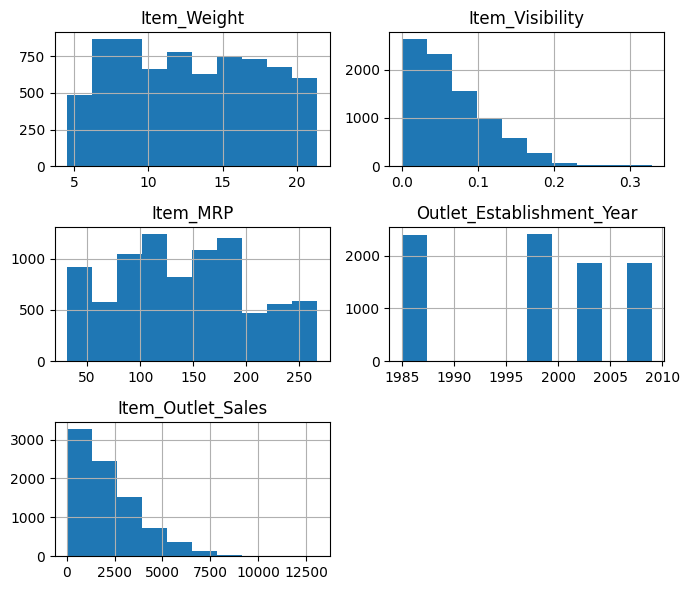

In [15]:
df_sales.hist()

plt.tight_layout()
plt.show()

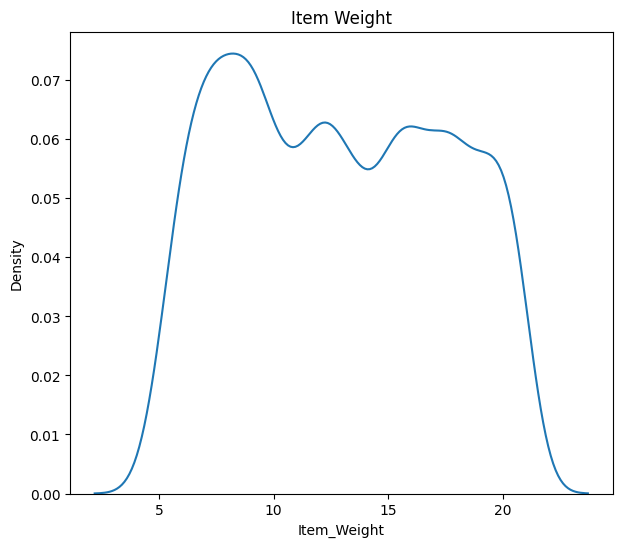

In [16]:
sns.kdeplot(df_sales['Item_Weight'])
plt.title('Item Weight')
plt.show()

In [17]:
me=df_sales['Item_Weight'].mean()
md=df_sales['Item_Weight'].median()
mo=df_sales['Item_Weight'].mode()[0]

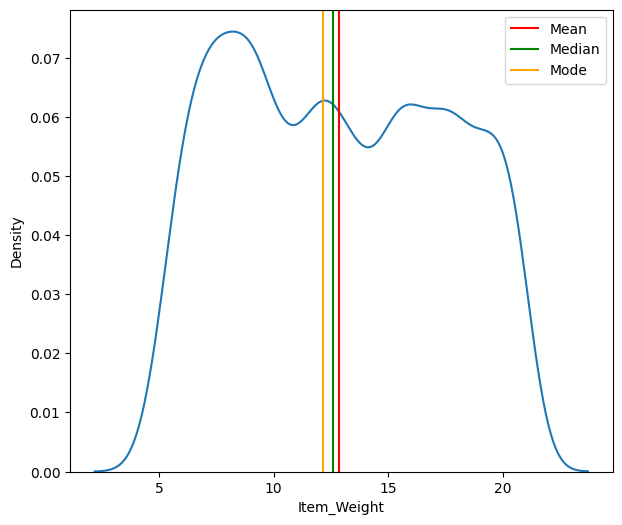

In [18]:
sns.kdeplot(df_sales['Item_Weight'])
plt.axvline(me,label='Mean',color='Red')
plt.axvline(md,label='Median',color='Green')
plt.axvline(mo,label='Mode',color='Orange')
plt.legend()
plt.show()

In [19]:
me_vis=df_sales['Item_Visibility'].mean()
md_vis=df_sales['Item_Visibility'].median()
mo_vis=df_sales['Item_Visibility'].mode()[0]

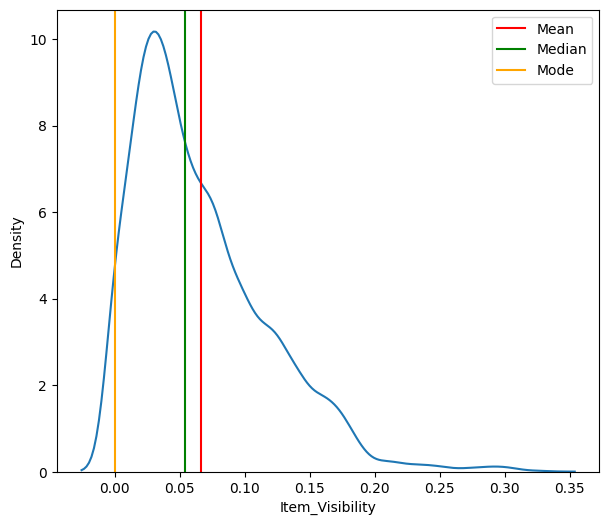

In [20]:
sns.kdeplot(df_sales['Item_Visibility'])
plt.axvline(me_vis,label='Mean',color='Red')
plt.axvline(md_vis,label='Median',color='Green')
plt.axvline(mo_vis,label='Mode',color='Orange')
plt.legend()
plt.show()

In [21]:
df_sales['Item_Weight'].skew()   # Skewness : Tells about the symmetric nature of the distribution data

0.0824262091221237

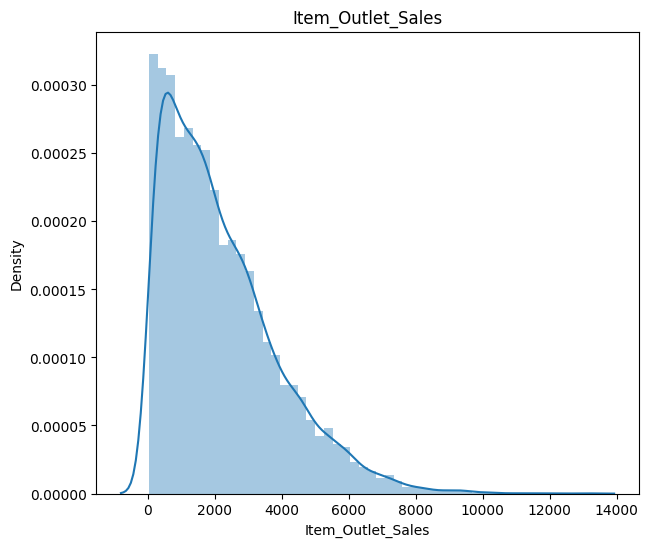

In [22]:
sns.distplot(df_sales['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales')
plt.show()

In [23]:
me_sales=df_sales['Item_Outlet_Sales'].mean()
md_sales=df_sales['Item_Outlet_Sales'].median()
mo_sales=df_sales['Item_Outlet_Sales'].mode()[0]

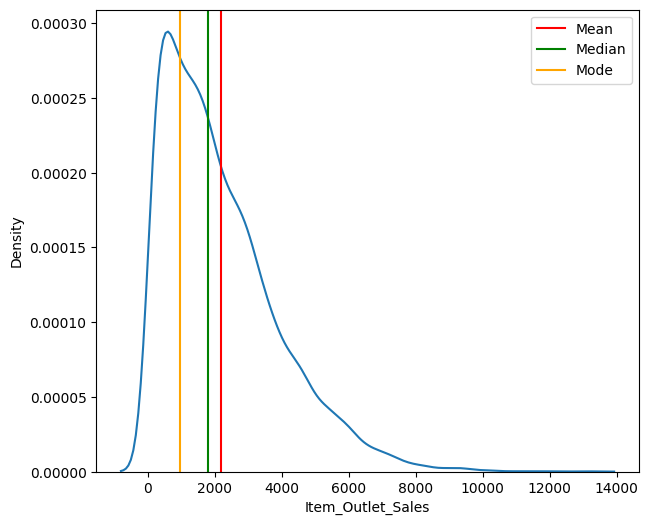

In [24]:
sns.kdeplot(df_sales['Item_Outlet_Sales'])
plt.axvline(me_sales,label='Mean',color='Red')
plt.axvline(md_sales,label='Median',color='Green')
plt.axvline(mo_sales,label='Mode',color='Orange')
plt.legend()
plt.show()

## Skewness and kurtosis for all the data Point

In [25]:
# Finding the skewness of the sales
print("Skewness for sales",df_sales['Item_Outlet_Sales'].skew())

Skewness for sales 1.1775306028542796


In [26]:
# Finding the kurtosis of the sales
print("kurtosis for sales",df_sales['Item_Outlet_Sales'].kurt())

kurtosis for sales 1.6158766814287264


In [27]:
df_sales.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127390
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [28]:
df_sales.kurt()

Item_Weight                 -1.227766
Item_Visibility              1.679445
Item_MRP                    -0.887901
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            1.615877
dtype: float64

### Univariate Analysis- Boxplot,Violin Plots

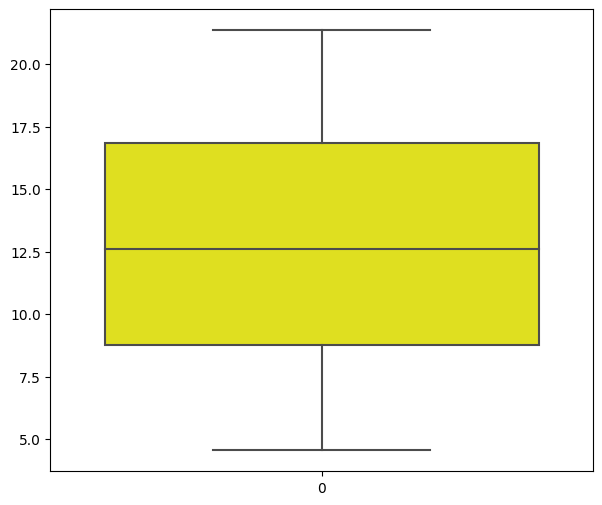

In [29]:
sns.boxplot(df_sales['Item_Weight'],color='yellow')
plt.show()

In [30]:
# The outlier impact the mean
# The outlier do not impact the median
# The outlier do not impact the mode
# It will be used in missing value fragments in the future

### Analysing cummaltive KDE plots as part of univariate analysis

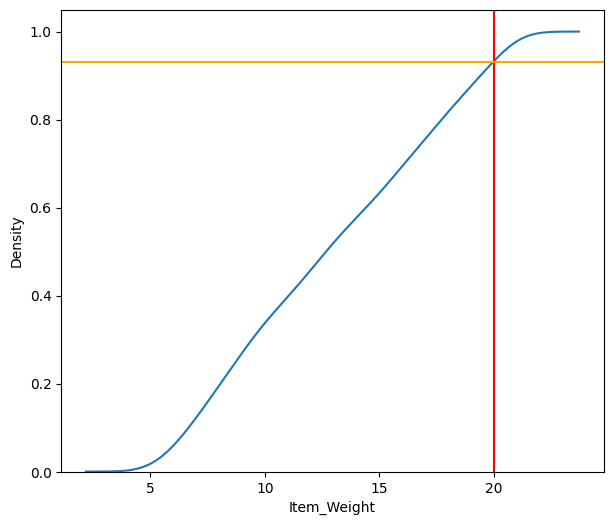

In [31]:
# Cummulative plot and its relevance
sns.kdeplot(x='Item_Weight',data=df_sales,cumulative=True)

plt.axvline(20,color='red')
plt.axhline(0.93,color='orange')
plt.show()

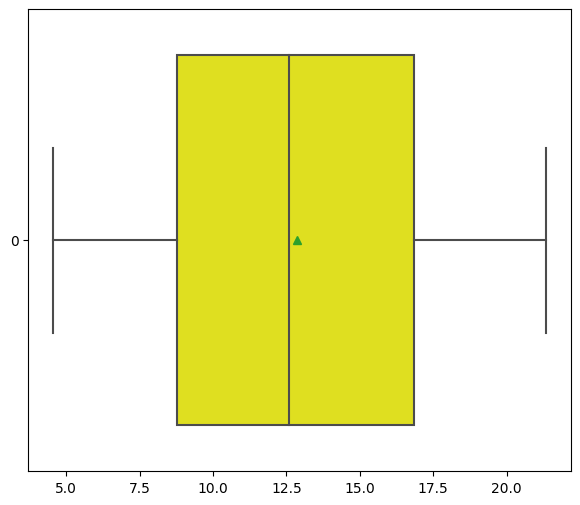

In [32]:
sns.boxplot(df_sales['Item_Weight'],color='yellow',showmeans=True,orient='h')
plt.show()

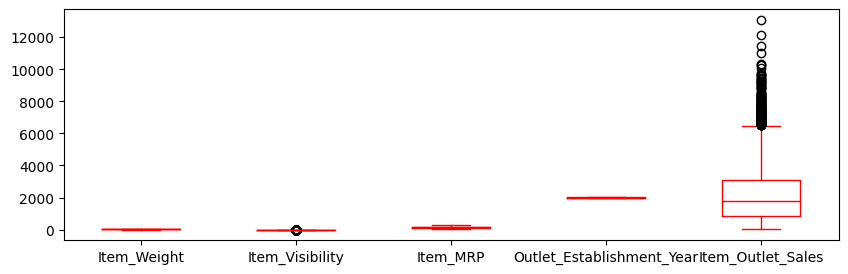

In [33]:
# Line,bar,hist,barh,box,kde
plt.rcParams['figure.figsize']=[10,3]
df_sales.plot(kind='box',color='red')
plt.show()

In [34]:
plt.rcParams['figure.figsize']=[10,3]

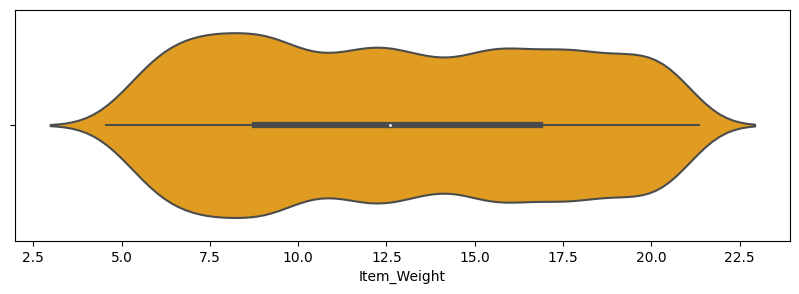

In [35]:
sns.violinplot(x='Item_Weight',data=df_sales,color='orange');
plt.show()

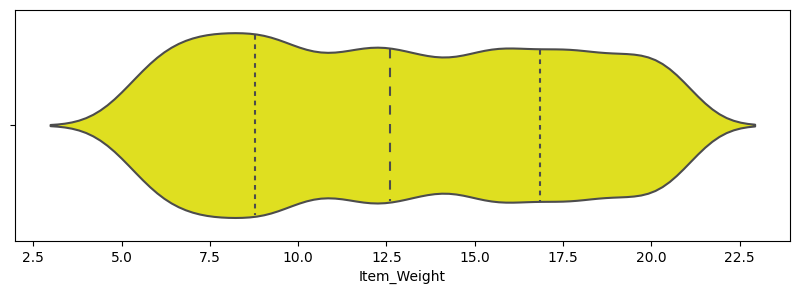

In [36]:
sns.violinplot(x='Item_Weight',data=df_sales,color='yellow',inner='quartiles')
plt.show()

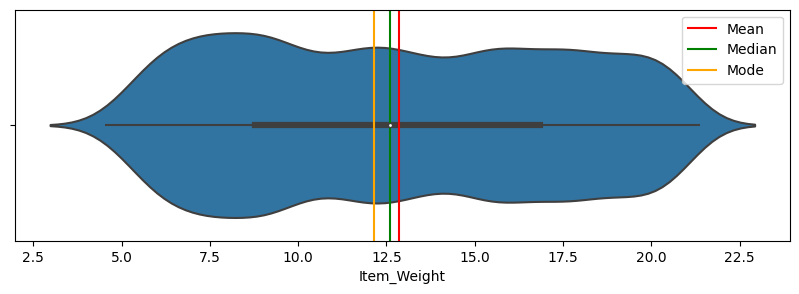

In [37]:
# when we select inner = quartile the box inside the violin plot is replaced
sns.violinplot(x='Item_Weight',data=df_sales)
plt.axvline(df_sales['Item_Weight'].mean(),label='Mean',color='Red')
plt.axvline(df_sales['Item_Weight'].median(),label='Median',color='Green')
plt.axvline(df_sales['Item_Weight'].mode()[0],label='Mode',color='Orange')
plt.legend()
plt.show()

In [38]:
max(df_sales['Item_Outlet_Sales'])-min(df_sales['Item_Outlet_Sales'])

13053.674799999999

In [39]:
(df_sales['Item_Outlet_Sales']).std()

1706.499615733833

In [40]:
(df_sales['Item_Outlet_Sales']).var()  # Variance

2912140.93849972

In [41]:
# Coefficient of variation
cv_sales=(df_sales['Item_Outlet_Sales']).std()/(df_sales['Item_Outlet_Sales']).mean()
cv_sales

0.7823354371415929

In [42]:
cv_weight=(df_sales['Item_Weight']).std()/(df_sales['Item_Weight']).mean()
cv_weight

0.36114361787768157

In [43]:
df_sales.std()/df_sales.mean()

Item_Weight                  0.361144
Item_Visibility              0.780224
Item_MRP                     0.441550
Outlet_Establishment_Year    0.004190
Item_Outlet_Sales            0.782335
dtype: float64

In [44]:
df_sales.cov()           # Covariance

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,21.561688,-0.003172,7.907894,-0.354551,1.005608e+02
Item_Visibility,-0.003172,0.002662,-0.005131,-0.032325,-1.132561e+01
Item_MRP,7.907894,-0.005131,3876.070885,2.629821,6.029901e+04
Outlet_Establishment_Year,-0.354551,-0.032325,2.629821,70.086372,-7.019621e+02
Item_Outlet_Sales,100.560811,-11.325611,60299.006078,-701.962133,2.912141e+06


In [45]:
df_sales.corr()     # correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027295,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001597,-0.074834,-0.128625
Item_MRP,0.027295,-0.001597,1.000000,0.005046,0.567555
Outlet_Establishment_Year,-0.011588,-0.074834,0.005046,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567555,-0.049135,1.000000


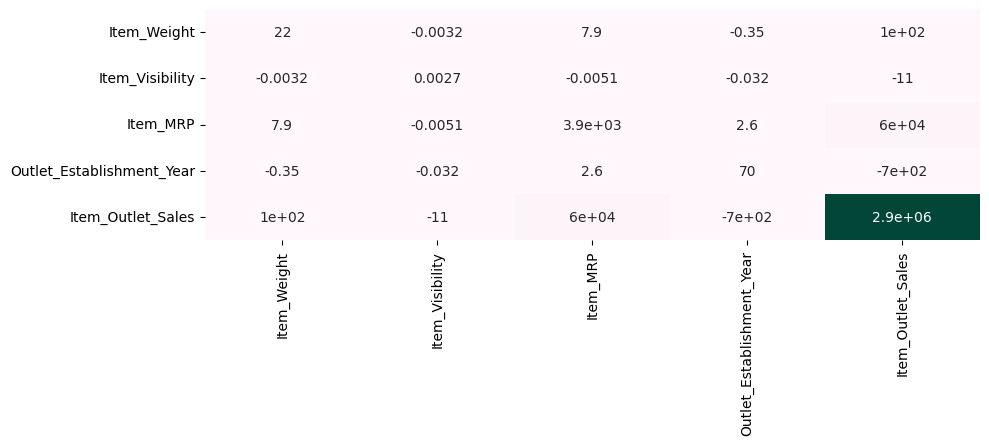

In [46]:
# Coefficient of variation
sns.heatmap(df_sales.cov(),annot=True,cmap='PuBuGn',cbar=False)
plt.show()

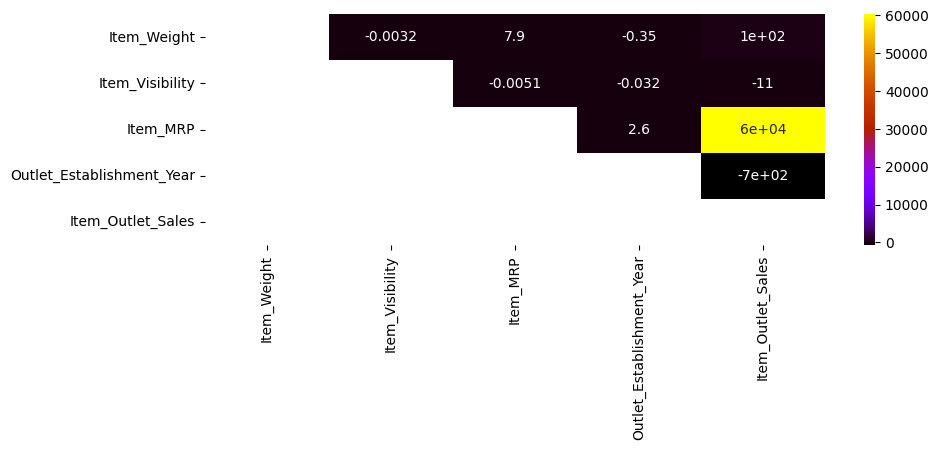

In [47]:
sns.heatmap(df_sales.cov(),mask=np.tril(df_sales.cov()),annot=True,cmap='gnuplot')
plt.show()

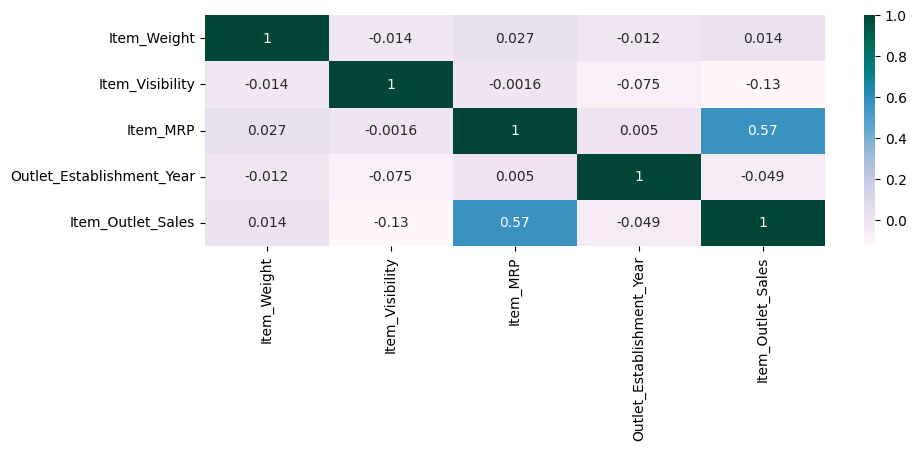

In [48]:
# correlation
sns.heatmap(df_sales.corr(),annot=True,cmap='PuBuGn')
plt.show()

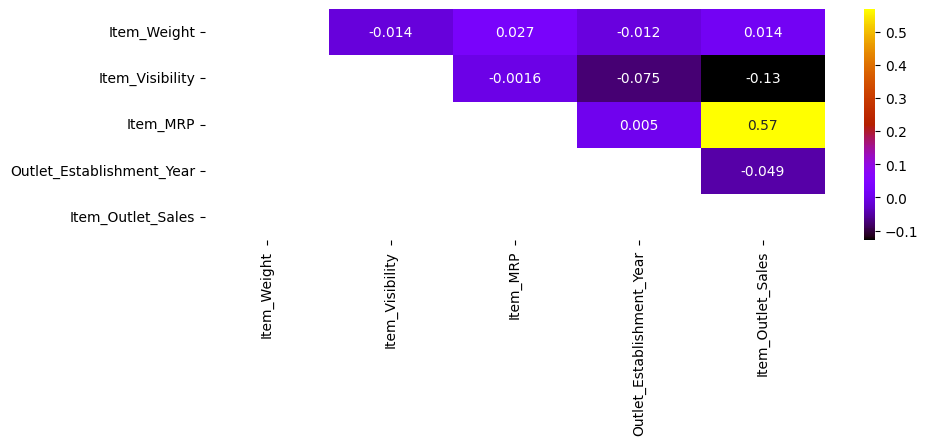

In [49]:
sns.heatmap(df_sales.corr(),mask=np.tril(df_sales.corr()),annot=True,cmap='gnuplot')
plt.show()

### Count plot

In [50]:
df_sales.select_dtypes(np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [51]:
cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [52]:
df_sales.select_dtypes('object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

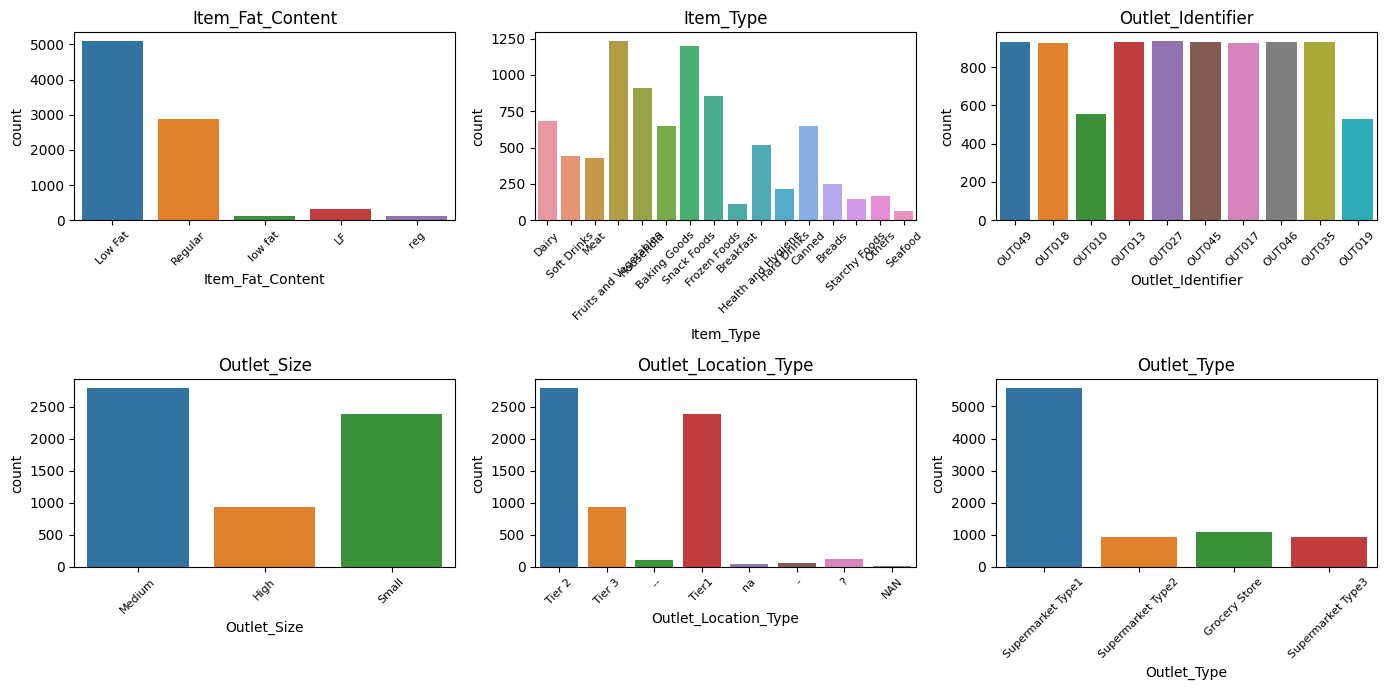

In [53]:
plt.rcParams['figure.figsize']=[14,7]
j=1
for i in cols:
    plt.subplot(2,3,j)
    sns.countplot(x=df_sales.loc[:,i])
    plt.title(i)
    j=j+1

    plt.xticks(rotation=45,fontsize=8)

plt.tight_layout()
plt.show()

### Scatter Plot

In [54]:
df_sales.select_dtypes(include=np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [55]:
cols=['Item_Weight', 'Item_Visibility', 'Item_MRP']

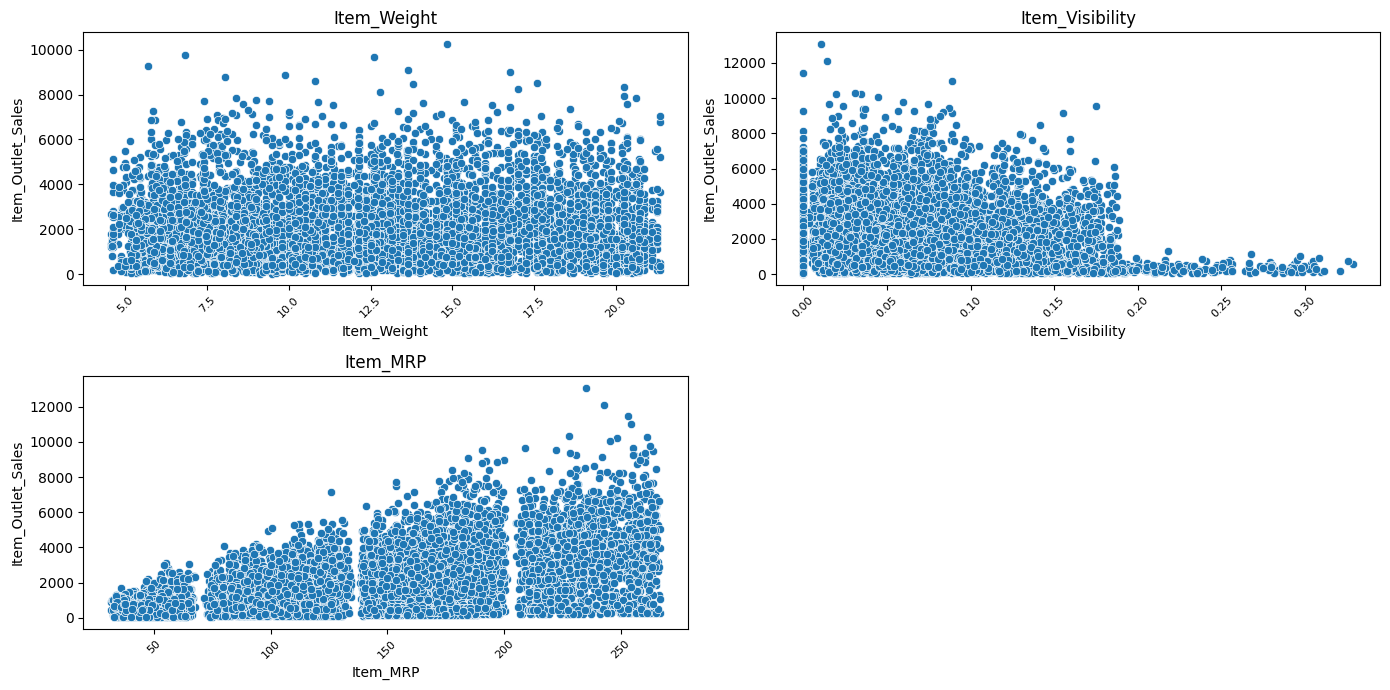

In [56]:
plt.rcParams['figure.figsize']=[14,7]
j=1
for i in cols:
    plt.subplot(2,2,j)
    sns.scatterplot(x=df_sales.loc[:,i],y=df_sales['Item_Outlet_Sales'])
    plt.title(i)
    j=j+1

    plt.xticks(rotation=45,fontsize=8)

plt.tight_layout()
plt.show()

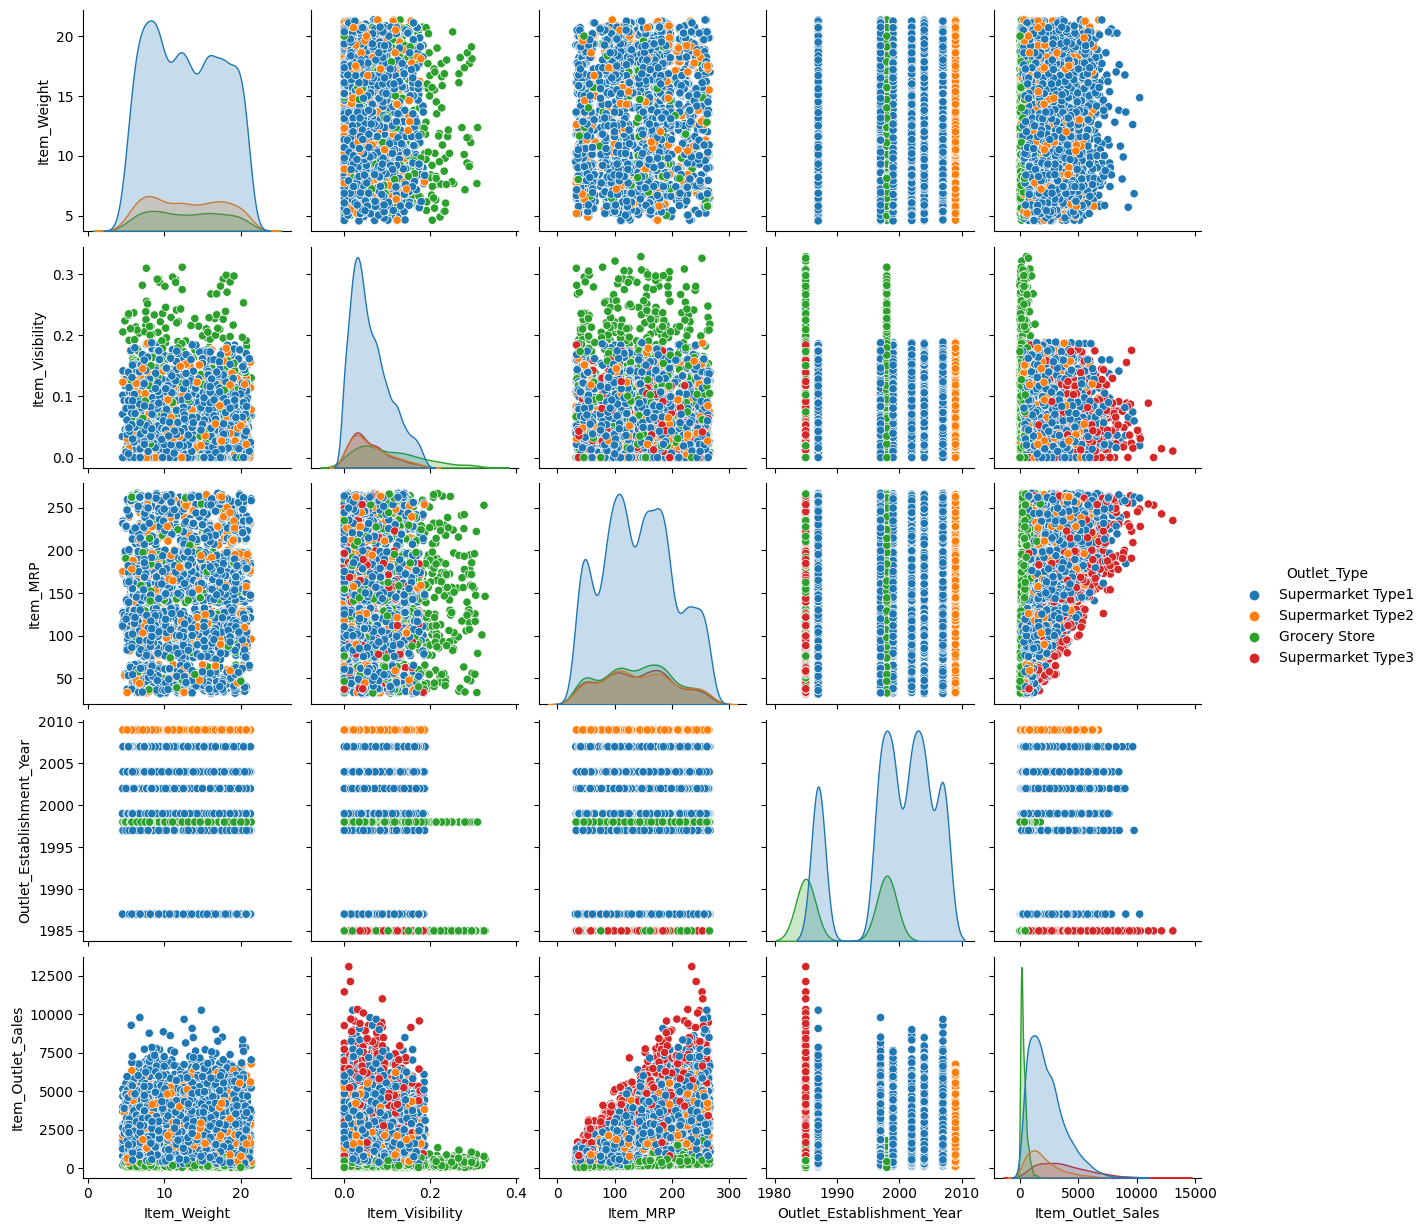

In [57]:
sns.pairplot(df_sales,hue='Outlet_Type');

### Bivariate analysis - categorical to numberical

In [58]:
cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

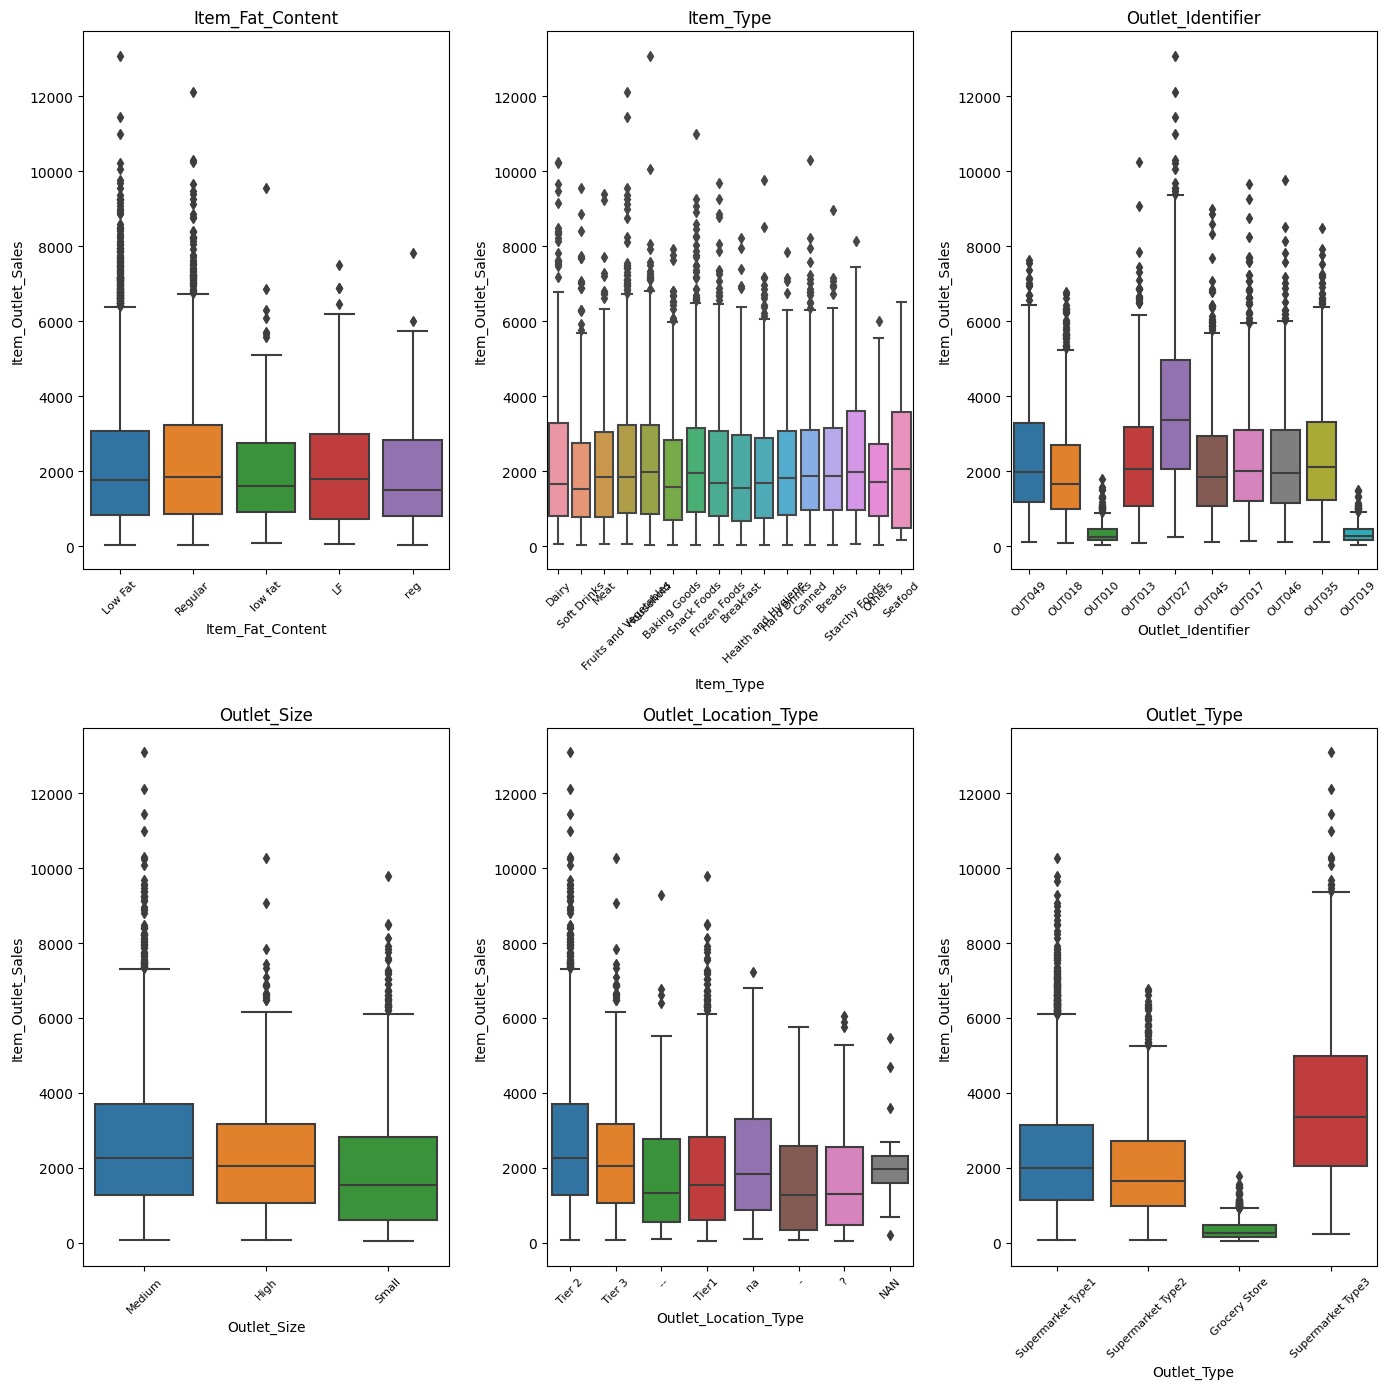

In [59]:
plt.rcParams['figure.figsize']=[14,14]
j=1
for i in cols:
    plt.subplot(2,3,j)
    sns.boxplot(x=df_sales.loc[:,i],y=df_sales['Item_Outlet_Sales'])
    plt.title(i)
    j=j+1

    plt.xticks(rotation=45,fontsize=8)

plt.tight_layout()
plt.show()

In [60]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [61]:
df_sales.isnull().sum()   # Total number of null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [62]:
df_sales.isnull().sum() / df_sales.shape[0] *100     # percentage of null value

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [63]:
df_sales.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [64]:
df_sales.isnull().sum()[df_sales.isnull().sum()>0]

Item_Weight             1463
Outlet_Size             2410
Outlet_Location_Type    2050
dtype: int64

### Missing value treatment

In [65]:
# Lets say we want to impute value the missing value for item weight
df_sales.groupby('Item_Fat_Content')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
LF,260.0,12.803212,4.742429,4.920,8.90500,12.15,17.5000,21.25
Low Fat,4222.0,12.953079,4.654783,4.590,8.76000,12.80,17.1000,21.35
Regular,2388.0,12.705840,4.624503,4.555,8.84000,12.50,16.7000,21.20
low fat,84.0,12.563988,4.347294,5.485,8.84500,12.50,16.7125,21.25
reg,106.0,12.842642,4.581413,5.460,8.52625,13.00,16.7000,20.85


In [66]:
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace('LF','Low Fat').replace('reg','Regular').replace('low fat','Low Fat')

In [67]:
df_sales.groupby('Item_Fat_Content')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,4566.0,12.937387,4.653787,4.590,8.775,12.65,17.1,21.35
Regular,2494.0,12.711654,4.621851,4.555,8.770,12.50,16.7,21.20


In [68]:
# CASE 2

In [69]:
df_sales.groupby('Item_Type')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,536.0,12.277108,4.773622,4.880,8.23500,11.650,15.75,20.85
Breads,204.0,11.346936,4.440540,4.635,7.12875,10.600,14.85,20.85
Breakfast,89.0,12.768202,5.038131,6.425,8.06000,10.695,17.25,21.10
Canned,539.0,12.305705,4.586564,4.615,8.11500,12.150,16.25,21.35
Dairy,566.0,13.426069,4.686532,4.805,9.27750,13.350,17.60,20.70
Frozen Foods,718.0,12.867061,4.507383,4.555,8.93500,12.850,17.00,20.85
Fruits and Vegetables,1019.0,13.224769,4.575275,5.460,9.19500,13.100,17.10,21.35
Hard Drinks,183.0,11.400328,4.239144,4.610,8.26000,10.100,14.85,19.70
Health and Hygiene,430.0,13.142314,4.512313,5.175,9.69500,12.150,17.60,21.25


In [70]:
# Case 3

In [71]:
df_sales.groupby('Item_Identifier')['Item_Weight'].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Identifier,,,,,,,,
DRA12,6.0,11.600,0.000000e+00,11.600,11.600,11.600,11.600,11.600
DRA24,5.0,19.350,0.000000e+00,19.350,19.350,19.350,19.350,19.350
DRA59,6.0,8.270,0.000000e+00,8.270,8.270,8.270,8.270,8.270
DRB01,2.0,7.390,0.000000e+00,7.390,7.390,7.390,7.390,7.390
DRB13,5.0,6.115,0.000000e+00,6.115,6.115,6.115,6.115,6.115
...,...,...,...,...,...,...,...,...
NCZ30,6.0,6.590,9.729507e-16,6.590,6.590,6.590,6.590,6.590
NCZ41,5.0,19.850,0.000000e+00,19.850,19.850,19.850,19.850,19.850
NCZ42,5.0,10.500,0.000000e+00,10.500,10.500,10.500,10.500,10.500


In [72]:
df_sales[['Item_Identifier','Item_Weight','Item_Type']][df_sales.Item_Identifier=='FDA15']

,Item_Identifier,Item_Weight,Item_Type
0,FDA15,9.3,Dairy
831,FDA15,9.3,Dairy
2599,FDA15,9.3,Dairy
2643,FDA15,9.3,Dairy
4874,FDA15,9.3,Dairy
5413,FDA15,9.3,Dairy
6696,FDA15,NaN,Dairy
7543,FDA15,9.3,Dairy


In [73]:
df_sales[['Item_Identifier','Item_Weight','Item_Type']][df_sales.Item_Identifier=='NCZ05']

,Item_Identifier,Item_Weight,Item_Type
1208,NCZ05,8.485,Health and Hygiene
3244,NCZ05,8.485,Health and Hygiene
7873,NCZ05,NaN,Health and Hygiene


In [74]:
# CASE 4

In [75]:
df_sales['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [76]:
df_sales['Item_Weight']= df_sales.groupby('Item_Identifier')['Item_Weight'].transform(lambda x : x.fillna(x.median()))

In [77]:
df_sales.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Outlet_Location_Type         2050
Item_Weight                     4
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [78]:
# .loc[condition, Name of column].apply the function
df_sales.loc[df_sales['Item_Type']=='Frozen Foods','Item_Weight'].median()

12.85

In [79]:
# Take the index number where it is missing and replace that column with median value
df_sales.loc[927,'Item_Weight']=12.85

In [80]:
df_sales.loc[df_sales['Item_Type']=='Snack Foods','Item_Weight'].median()

13.15

In [81]:
df_sales.loc[1922,'Item_Weight']=13.15

In [82]:
df_sales.loc[df_sales['Item_Type']=='Dairy','Item_Weight'].median()

13.35

In [83]:
df_sales.loc[4187,'Item_Weight']=13.35

In [84]:
df_sales.loc[df_sales['Item_Type']=='Baking Goods','Item_Weight'].median()

11.65

In [85]:
df_sales.loc[5022,'Item_Weight']=11.65

In [86]:
df_sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [87]:
# Case 1

In [88]:
df_sales.groupby('Item_Fat_Content')['Outlet_Size'].describe()

,count,unique,top,freq
Item_Fat_Content,,,,
Low Fat,3955,3,Medium,1799
Regular,2158,3,Medium,994


In [89]:
# Case 2        -- best

In [90]:
df_sales.groupby('Outlet_Type')['Outlet_Size'].describe()

,count,unique,top,freq
Outlet_Type,,,,
Grocery Store,528,1,Small,528
Supermarket Type1,3722,3,Small,1860
Supermarket Type2,928,1,Medium,928
Supermarket Type3,935,1,Medium,935


In [91]:
# Case 3

In [92]:
df_sales.groupby('Outlet_Location_Type')['Outlet_Size'].describe()

,count,unique,top,freq
Outlet_Location_Type,,,,
-,0,0,NaN,NaN
--,0,0,NaN,NaN
?,0,0,NaN,NaN
NAN,0,0,NaN,NaN
Tier 2,2793,1,Medium,2793
Tier 3,932,1,High,932
Tier1,2388,1,Small,2388
na,0,0,NaN,NaN


In [93]:
# Case 4

In [94]:
df_sales.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].describe()

count unique     top  freq
Outlet_Type       Outlet_Location_Type                           
Grocery Store       -                      0      0     NaN   NaN
                    --                     0      0     NaN   NaN
                  ?                        0      0     NaN   NaN
                  NAN                      0      0     NaN   NaN
                  Tier1                  528      1   Small   528
                  na                       0      0     NaN   NaN
Supermarket Type1   -                      0      0     NaN   NaN
                    --                     0      0     NaN   NaN
                  ?                        0      0     NaN   NaN
                  NAN                      0      0     NaN   NaN
                  Tier 2                 930      1  Medium   930
                  Tier 3                 932      1    High   932
                  Tier1                 1860      1   Small  1860
                  na                       0      0     NaN   NaN
Supermarket Type2 Tier 2                 928      1  Medium   928
Supermarket Type3 Tier 2                 935      1  Medium   935

In [95]:
# Lets take case 2 and replace the value with mode for the category
df_sales['Outlet_Size']= df_sales.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x : x.fillna(x.mode()[0]))

In [96]:
# Outlet_Location_Type
df_sales.groupby('Outlet_Location_Type').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
Outlet_Location_Type,,,,,,,,,,,
-,67,67,67,67,67,67,67,67,67,67,67
--,109,109,109,109,109,109,109,109,109,109,109
?,120,120,120,120,120,120,120,120,120,120,120
NAN,16,16,16,16,16,16,16,16,16,16,16
Tier 2,2793,2793,2793,2793,2793,2793,2793,2793,2793,2793,2793
Tier 3,932,932,932,932,932,932,932,932,932,932,932
Tier1,2388,2388,2388,2388,2388,2388,2388,2388,2388,2388,2388
na,48,48,48,48,48,48,48,48,48,48,48


In [97]:
df_sales['Outlet_Location_Type'] = df_sales['Outlet_Location_Type'].replace('  -',np.nan).replace('  --',np.nan).replace('?',np.nan).replace('NAN',np.nan).replace('na',np.nan)

In [98]:
df_sales['Outlet_Location_Type'].isnull().sum()

2410

In [99]:
# Case 1
df_sales.groupby('Outlet_Size')['Outlet_Location_Type'].describe()

,count,unique,top,freq
Outlet_Size,,,,
High,932,1,Tier 3,932
Medium,2793,1,Tier 2,2793
Small,2388,1,Tier1,2388


In [100]:
# Case 2
df_sales.groupby('Outlet_Type')['Outlet_Location_Type'].describe()

,count,unique,top,freq
Outlet_Type,,,,
Grocery Store,528,1,Tier1,528
Supermarket Type1,3722,3,Tier1,1860
Supermarket Type2,928,1,Tier 2,928
Supermarket Type3,935,1,Tier 2,935


In [101]:
# Case 3
df_sales.groupby(['Outlet_Size','Outlet_Type'])['Outlet_Location_Type'].describe()

count unique     top  freq
Outlet_Size Outlet_Type                                 
High        Supermarket Type1   932      1  Tier 3   932
Medium      Supermarket Type1   930      1  Tier 2   930
            Supermarket Type2   928      1  Tier 2   928
            Supermarket Type3   935      1  Tier 2   935
Small       Grocery Store       528      1   Tier1   528
            Supermarket Type1  1860      1   Tier1  1860

In [102]:
# Case 3 is best we replace by mode bin the missing value
df_sales['Outlet_Location_Type']= df_sales.groupby(["Outlet_Size","Outlet_Type"])['Outlet_Location_Type'].apply(
    lambda x : x.fillna(x.mode()[0]))

In [103]:
df_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Outlier Treatment

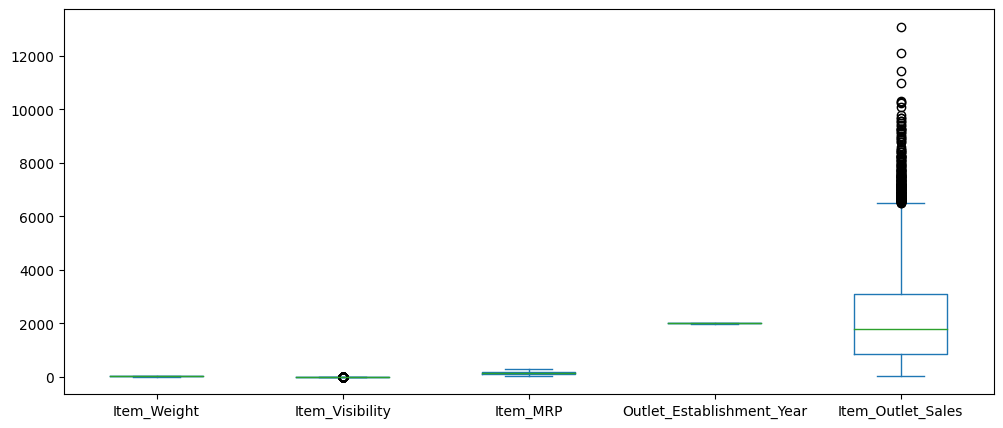

In [104]:
plt.rcParams['figure.figsize']=[12,5]
df_sales.plot(kind='box')
plt.show()

In [105]:
df_sales['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [106]:
print('1st quartile - q1-',df_sales['Item_Outlet_Sales'].quantile(0.25))
print('2st quartile - q2-',df_sales['Item_Outlet_Sales'].quantile(0.50))
print('3st quartile - q3-',df_sales['Item_Outlet_Sales'].quantile(0.75))

1st quartile - q1- 834.2474
2st quartile - q2- 1794.331
3st quartile - q3- 3101.2964


In [107]:
q1=df_sales['Item_Outlet_Sales'].quantile(0.25)
q3=df_sales['Item_Outlet_Sales'].quantile(0.75)
print('Interquartile range=', q3-q1)

Interquartile range= 2267.049


In [108]:
df_sales.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [109]:
num_cols=df_sales.select_dtypes(include=np.number)
num_cols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

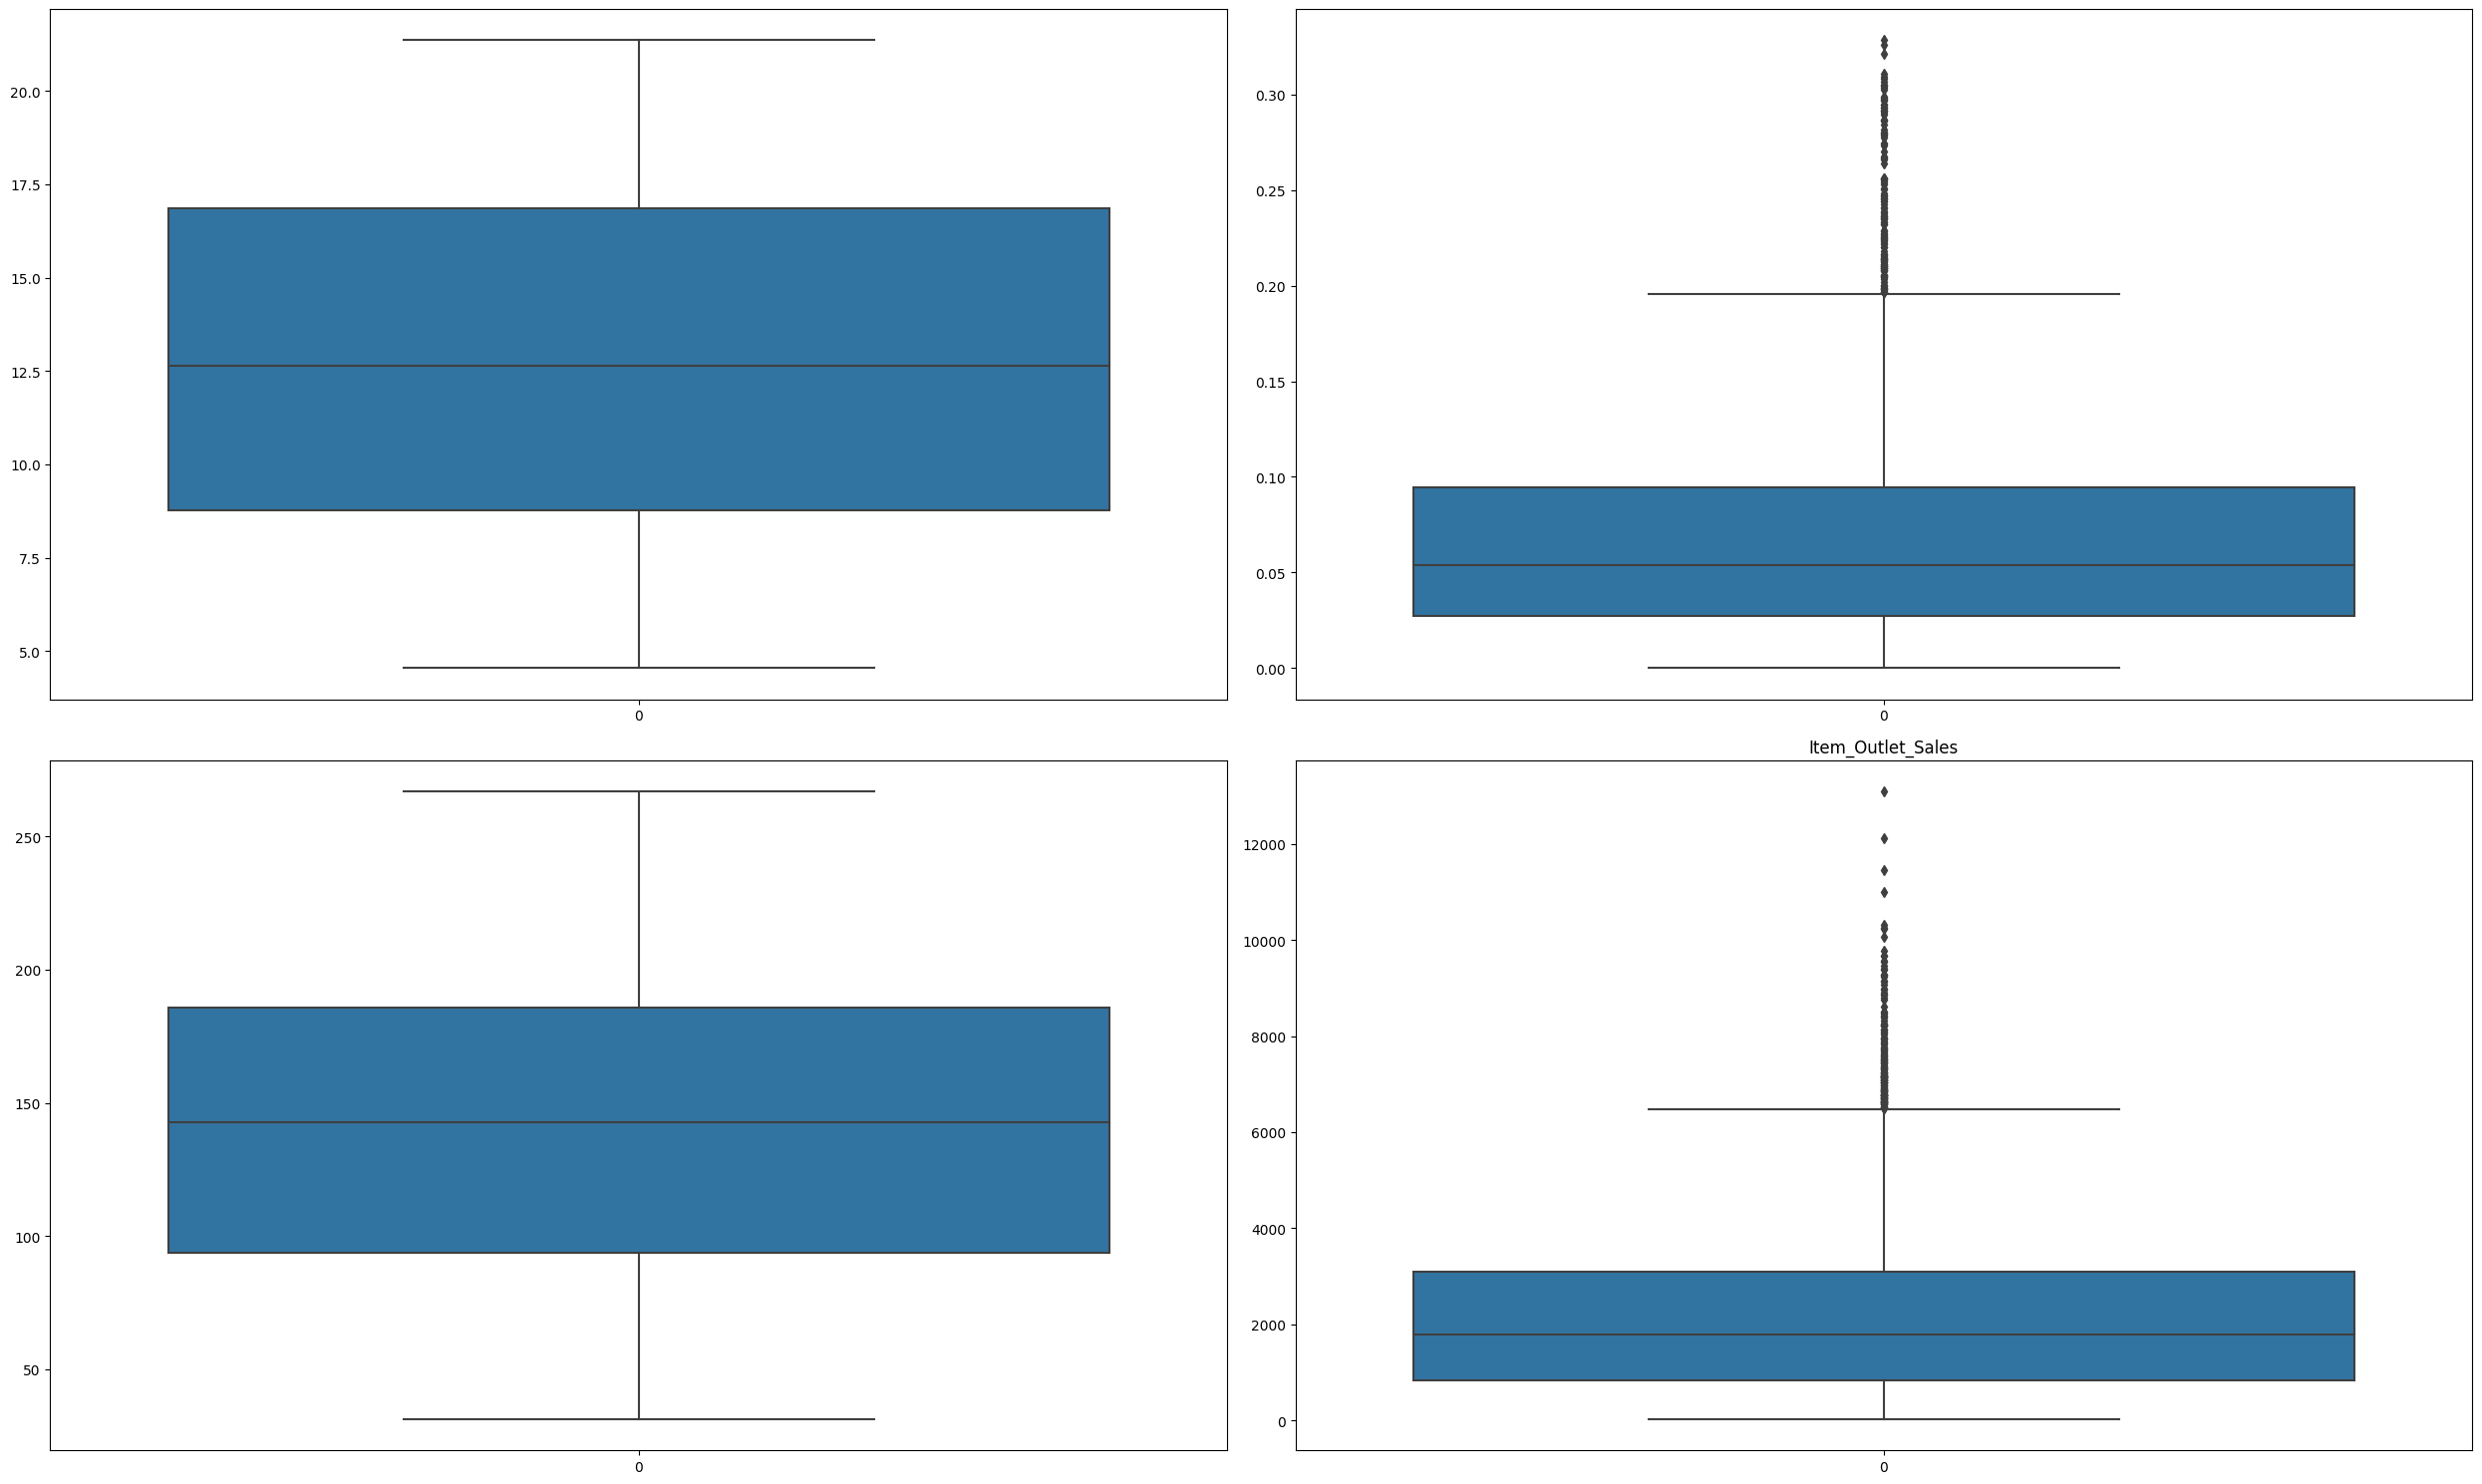

In [110]:
fig,ax=plt.subplots(2,2,figsize=(25,15))
for i, subplot in zip(num_cols,ax.flatten()):
    sns.boxplot(df_sales[i],ax=subplot)
    plt.title(i)
plt.tight_layout()
plt.show()

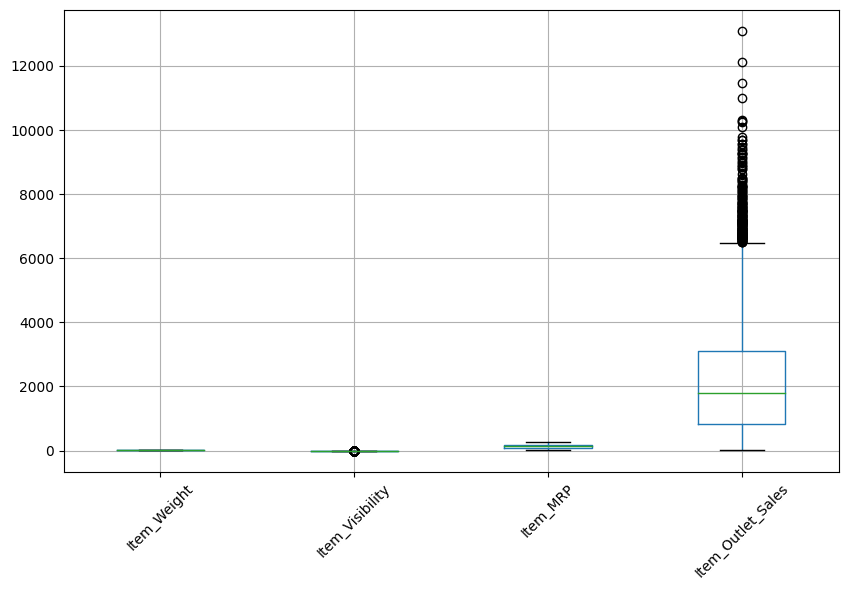

In [111]:
plt.rcParams['figure.figsize']=[10,6]
df_sales.boxplot()
plt.xticks(rotation=45)
plt.show()

In [112]:
q1=df_sales.quantile(0.25)
q3=df_sales.quantile(0.75)

In [113]:
Iqr=q3-q1

In [114]:
lower_limit=q1-1.5*(Iqr)
upper_limit=q3+1.5*(Iqr)

In [115]:
#df_rem_out=df_sales[~(df_sales<(lower_limit)) | (df_sales>(upper_limit)).any(axis=1)]
# df_rem_out

### Scaling

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [117]:
sc = StandardScaler()
mm=MinMaxScaler()

In [118]:
df_num=df_sales.select_dtypes(include=np.number)
df_num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8,3735.1380
1,5.92,0.019278,48.3,443.4228
2,17.50,0.016760,141.6,2097.2700
3,19.20,0.000000,182.1,732.3800
4,8.93,0.000000,53.9,994.7052


In [119]:
sc.fit_transform(df_num)

array([[-0.76976266, -0.97073217,  1.74768499,  0.910601  ],
       [-1.4974647 , -0.90811123, -1.48903161, -1.01844035],
       [ 0.99566834, -0.95691733,  0.00965652, -0.04923754],
       ...,
       [-0.48987725, -0.59978449, -0.89790917, -0.57909963],
       [-1.21973226,  1.53287976, -0.6087732 , -0.19672492],
       [ 0.41436789, -0.41193591, -1.05211502, -0.82959407]])

In [120]:
df_scaled_sc= pd.DataFrame(sc.fit_transform(df_num),columns=df_num.columns)   # -1 to 1
df_scaled_sc.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.769763,-0.970732,1.747685,0.910601
1,-1.497465,-0.908111,-1.489032,-1.018440
2,0.995668,-0.956917,0.009657,-0.049238
3,1.361672,-1.281758,0.660212,-0.849103
4,-0.849422,-1.281758,-1.399078,-0.695373


In [121]:
df_scaled_sc.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,3.934954e-16,-1.092117e-16,4.460171e-17,1.638175e-16
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.791344e+00,-1.281758e+00,-1.762104e+00,-1.258790e+00
25%,-8.806403e-01,-7.586531e-01,-7.581601e-01,-7.894057e-01
50%,-4.851951e-02,-2.364792e-01,2.732594e-02,-2.267687e-01
75%,8.557256e-01,5.514755e-01,7.172365e-01,5.391513e-01
max,1.824560e+00,5.083050e+00,2.022364e+00,6.391045e+00


In [122]:
df_scaled_mm = pd.DataFrame(mm.fit_transform(df_num),columns=df_num.columns)  # 0 to 1
df_scaled_mm.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,0.282525,0.048866,0.927419,0.283587
1,0.081274,0.058705,0.072156,0.031419
2,0.770765,0.051037,0.468166,0.158115
3,0.871986,0.000000,0.640068,0.053555
4,0.260494,0.000000,0.095925,0.073651


### Z-Scaler

In [123]:
df_sales_copy=df_sales.copy()

In [124]:
df_sales_copy.shape

(8523, 11)

In [125]:
num_copy=df_sales_copy.select_dtypes(np.number)

In [126]:
df_scaled_copy= pd.DataFrame(sc.fit_transform(num_copy),columns=num_copy.columns)
df_scaled_copy.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.769763,-0.970732,1.747685,0.910601
1,-1.497465,-0.908111,-1.489032,-1.018440
2,0.995668,-0.956917,0.009657,-0.049238
3,1.361672,-1.281758,0.660212,-0.849103
4,-0.849422,-1.281758,-1.399078,-0.695373


In [127]:
df_rem_zscore= df_scaled_copy[~((df_scaled_copy<(-3)) | (df_scaled_copy>(3))).any(axis=1)]
df_rem_zscore.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,-0.769763,-0.970732,1.747685,0.910601
1,-1.497465,-0.908111,-1.489032,-1.018440
2,0.995668,-0.956917,0.009657,-0.049238
3,1.361672,-1.281758,0.660212,-0.849103
4,-0.849422,-1.281758,-1.399078,-0.695373


## Encoding

In [128]:
df_sales.select_dtypes(include ='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### One hot encoding

In [129]:
df_cat=df_sales.select_dtypes(include ='object')
df_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 2,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 2,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 2,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier1,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [130]:
pd.get_dummies(df_cat)

,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,Item_Identifier_DRB48,Item_Identifier_DRC01,Item_Identifier_DRC12,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
8519,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
8520,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
8521,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [131]:
df_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [132]:
df_sales['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [133]:
### Using replace function

In [134]:
df_sales.replace({'Small':1,'Medium':2,'High':3},inplace=True)

In [135]:
df_sales['Outlet_Size'].value_counts()

1    4798
2    2793
3     932
Name: Outlet_Size, dtype: int64

In [136]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   int64  
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


### Frequency Encoding

### Item Type

In [137]:
df_sales['Item_Type'].value_counts(normalize=True)

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

In [138]:
df_sales['Item_Type'].value_counts(normalize=True).to_dict()

{'Fruits and Vegetables': 0.14455004106535257,
 'Snack Foods': 0.1407954945441746,
 'Household': 0.10676991669599906,
 'Frozen Foods': 0.1004341194415112,
 'Dairy': 0.0800187727326059,
 'Canned': 0.07614689663264108,
 'Baking Goods': 0.07602956705385427,
 'Health and Hygiene': 0.06101138096914232,
 'Soft Drinks': 0.05221166256013141,
 'Meat': 0.04986507098439517,
 'Breads': 0.02944972427548985,
 'Hard Drinks': 0.0251085298603778,
 'Others': 0.019828698814971256,
 'Starchy Foods': 0.017364777660448198,
 'Breakfast': 0.012906253666549338,
 'Seafood': 0.007509093042355978}

In [139]:
norm_items=df_sales['Item_Type'].value_counts(normalize=True).to_dict()

In [140]:
df_sales['Item_Type_PCNT']=df_sales['Item_Type'].map(norm_items)

In [141]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_PCNT
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,2,Tier 2,Supermarket Type1,3735.1380,0.080019
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2,Tier 2,Supermarket Type2,443.4228,0.052212
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,2,Tier 2,Supermarket Type1,2097.2700,0.049865
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1,Tier1,Grocery Store,732.3800,0.144550
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,3,Tier 3,Supermarket Type1,994.7052,0.106770


### Target Encoding

In [142]:
df_sales['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [143]:
df_sales.groupby('Outlet_Identifier')['Item_Outlet_Sales'].median()

Outlet_Identifier
OUT010     250.3408
OUT013    2050.6640
OUT017    2005.0567
OUT018    1655.1788
OUT019     265.3213
OUT027    3364.9532
OUT035    2109.2544
OUT045    1834.9448
OUT046    1945.8005
OUT049    1966.1074
Name: Item_Outlet_Sales, dtype: float64

In [144]:
outlet_id=df_sales.groupby('Outlet_Identifier')['Item_Outlet_Sales'].median().to_dict()
outlet_id

{'OUT010': 250.3408,
 'OUT013': 2050.664,
 'OUT017': 2005.0567,
 'OUT018': 1655.1788,
 'OUT019': 265.3213,
 'OUT027': 3364.9532,
 'OUT035': 2109.2544,
 'OUT045': 1834.9448,
 'OUT046': 1945.8004999999998,
 'OUT049': 1966.1074}

In [145]:
df_sales['Outlet_Id_Trg']=df_sales['Outlet_Identifier'].map(outlet_id)
df_sales['Outlet_Id_Trg']

0       1966.1074
1       1655.1788
2       1966.1074
3        250.3408
4       2050.6640
          ...    
8518    2050.6640
8519    1834.9448
8520    2109.2544
8521    1655.1788
8522    1945.8005
Name: Outlet_Id_Trg, Length: 8523, dtype: float64

In [146]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   object 
 7   Outlet_Size           8523 non-null   int64  
 8   Outlet_Location_Type  8523 non-null   object 
 9   Outlet_Type           8523 non-null   object 
 10  Item_Outlet_Sales     8523 non-null   float64
 11  Item_Type_PCNT        8523 non-null   float64
 12  Outlet_Id_Trg         8523 non-null   float64
dtypes: float64(6), int64(1), object(6)
memory usage: 865.7+ KB


In [147]:
# Now check the correlation between OUTLET ID TRG and SALES

In [148]:
df_sales[['Outlet_Id_Trg','Item_Outlet_Sales']].corr()

,Outlet_Id_Trg,Item_Outlet_Sales
Outlet_Id_Trg,1.000000,0.489391
Item_Outlet_Sales,0.489391,1.000000


## Target Encoding

### Item Type

In [149]:
df_sales['Item_Type'].nunique()

16

In [150]:
Veg=['Dairy','Fruits and Vegetables','Baking Goods','Snack Foods','Frozen Foods','Breakfast',
     'Canned','Breads','Starchy Foods']
Non_Veg = ['Meat','Seafood']
Drinks =['Soft Drinks','Hard Drinks']
others =['Health and Hygiene','Others']

In [151]:
def food_type(x):
    if x in Veg:
        return('Veg')
    elif x in Non_Veg:
        return ('Non_Veg')
    elif x in Drinks:
        return ('Drinks')
    else:
        return('Others')

In [152]:
df_sales['Item_Type_GRP']=df_sales['Item_Type'].apply(food_type)

In [153]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_PCNT,Outlet_Id_Trg,Item_Type_GRP
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,2,Tier 2,Supermarket Type1,3735.1380,0.080019,1966.1074,Veg
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2,Tier 2,Supermarket Type2,443.4228,0.052212,1655.1788,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,2,Tier 2,Supermarket Type1,2097.2700,0.049865,1966.1074,Non_Veg
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1,Tier1,Grocery Store,732.3800,0.144550,250.3408,Veg
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,3,Tier 3,Supermarket Type1,994.7052,0.106770,2050.6640,Others


In [154]:
pd.get_dummies(df_sales['Item_Type_GRP'])

,Drinks,Non_Veg,Others,Veg
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
8518,0,0,0,1
8519,0,0,0,1
8520,0,0,1,0
8521,0,0,0,1


In [155]:
pd.get_dummies(df_sales['Item_Type_GRP'],drop_first=True)

,Non_Veg,Others,Veg
0,0,0,1
1,0,0,0
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
8518,0,0,1
8519,0,0,1
8520,0,1,0
8521,0,0,1


In [156]:
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_PCNT,Outlet_Id_Trg,Item_Type_GRP
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,2,Tier 2,Supermarket Type1,3735.1380,0.080019,1966.1074,Veg
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2,Tier 2,Supermarket Type2,443.4228,0.052212,1655.1788,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,2,Tier 2,Supermarket Type1,2097.2700,0.049865,1966.1074,Non_Veg
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1,Tier1,Grocery Store,732.3800,0.144550,250.3408,Veg
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,3,Tier 3,Supermarket Type1,994.7052,0.106770,2050.6640,Others


### Drop the variable which are insignificant

In [157]:
df_sales=df_sales.drop(['Outlet_Identifier'],axis=1)

In [158]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   object 
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   object 
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   object 
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Size           8523 non-null   int64  
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Item_Type_PCNT        8523 non-null   float64
 11  Outlet_Id_Trg         8523 non-null   float64
 12  Item_Type_GRP         8523 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 865.7+ KB


## Frequency Encoding

In [159]:
df_sales['Item_Identifier'].nunique()

1559

In [160]:
df_sales['Item_Identifier'][0][:2]

'FD'

In [161]:
def food_id(x):
    return(x[:2])

In [162]:
df_sales['Item_ID_Code']=df_sales['Item_Identifier'].apply(food_id)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_PCNT,Outlet_Id_Trg,Item_Type_GRP,Item_ID_Code
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,2,Tier 2,Supermarket Type1,3735.1380,0.080019,1966.1074,Veg,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,2,Tier 2,Supermarket Type2,443.4228,0.052212,1655.1788,Drinks,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,2,Tier 2,Supermarket Type1,2097.2700,0.049865,1966.1074,Non_Veg,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,1,Tier1,Grocery Store,732.3800,0.144550,250.3408,Veg,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,3,Tier 3,Supermarket Type1,994.7052,0.106770,2050.6640,Others,NC


In [163]:
df_sales['Item_ID_Code'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_ID_Code, dtype: int64

## Box plot between identifier and sales

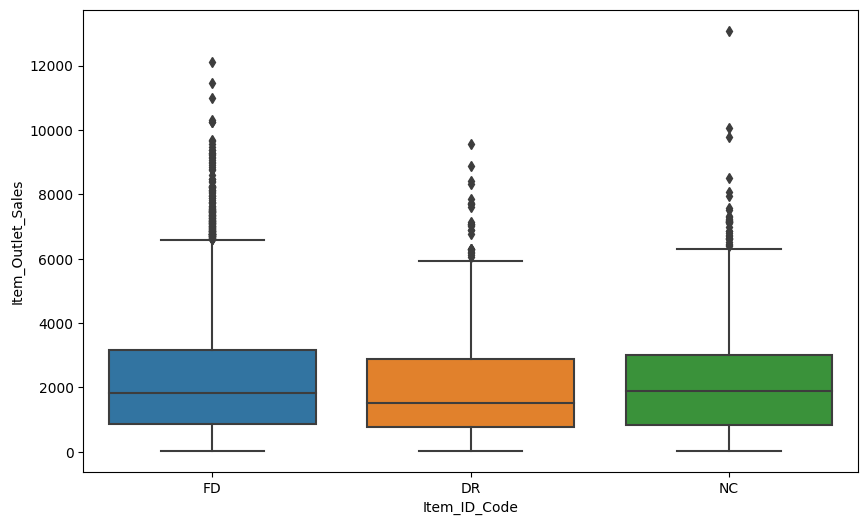

In [164]:
sns.boxplot(x='Item_ID_Code',y='Item_Outlet_Sales',data=df_sales)
plt.show()

### Item Visiblity - Replacing the 0's

In [165]:
# Through the missing values are none,however there seems to be anamoly in the datase

In [166]:
df_sales.groupby('Item_ID_Code')['Item_Visibility'].median()

Item_ID_Code
DR    0.049179
FD    0.056406
NC    0.044999
Name: Item_Visibility, dtype: float64

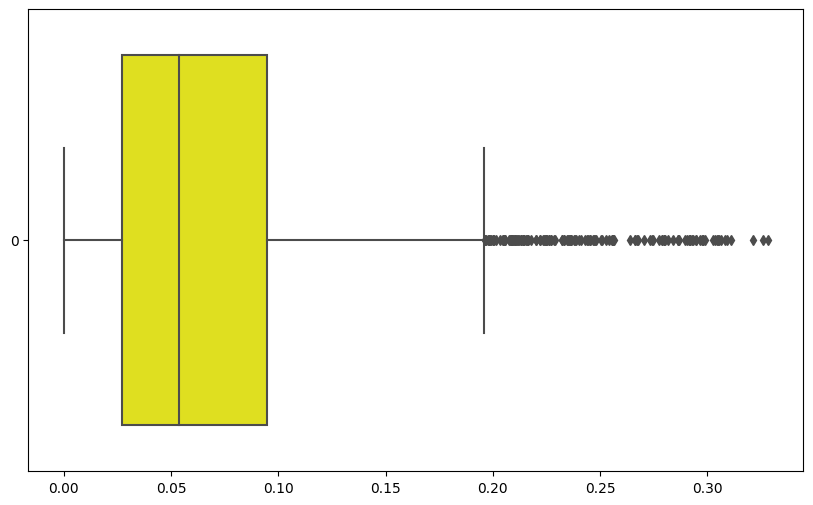

In [167]:
sns.boxplot(df_sales['Item_Visibility'],orient='h',color='yellow')
plt.show()

In [168]:
df_sales.groupby('Item_ID_Code')['Item_Visibility'].apply(lambda x: x.replace(0,x.median()))

0       0.016047
1       0.019278
2       0.016760
3       0.056406
4       0.044999
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [169]:
df_sales_new=df_sales.drop(['Item_Identifier','Item_Type'],axis=1)
df_sales_new.shape

(8523, 12)

In [170]:
df_sales_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_PCNT,Outlet_Id_Trg,Item_Type_GRP,Item_ID_Code
0,9.30,Low Fat,0.016047,249.8,2,Tier 2,Supermarket Type1,3735.1380,0.080019,1966.1074,Veg,FD
1,5.92,Regular,0.019278,48.3,2,Tier 2,Supermarket Type2,443.4228,0.052212,1655.1788,Drinks,DR
2,17.50,Low Fat,0.016760,141.6,2,Tier 2,Supermarket Type1,2097.2700,0.049865,1966.1074,Non_Veg,FD
3,19.20,Regular,0.000000,182.1,1,Tier1,Grocery Store,732.3800,0.144550,250.3408,Veg,FD
4,8.93,Low Fat,0.000000,53.9,3,Tier 3,Supermarket Type1,994.7052,0.106770,2050.6640,Others,NC


In [171]:
df_sales_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Size           8523 non-null   int64  
 5   Outlet_Location_Type  8523 non-null   object 
 6   Outlet_Type           8523 non-null   object 
 7   Item_Outlet_Sales     8523 non-null   float64
 8   Item_Type_PCNT        8523 non-null   float64
 9   Outlet_Id_Trg         8523 non-null   float64
 10  Item_Type_GRP         8523 non-null   object 
 11  Item_ID_Code          8523 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 799.2+ KB


### Dummy encoding all of them

In [172]:
pd.get_dummies(df_sales_new)[:2]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Item_Outlet_Sales,Item_Type_PCNT,Outlet_Id_Trg,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_GRP_Drinks,Item_Type_GRP_Non_Veg,Item_Type_GRP_Others,Item_Type_GRP_Veg,Item_ID_Code_DR,Item_ID_Code_FD,Item_ID_Code_NC
0,9.30,0.016047,249.8,2,3735.1380,0.080019,1966.1074,1,0,1,...,1,0,0,0,0,0,1,0,1,0
1,5.92,0.019278,48.3,2,443.4228,0.052212,1655.1788,0,1,1,...,0,1,0,1,0,0,0,1,0,0


In [173]:
df_cat=df_sales_new.drop(['Item_Weight','Item_Visibility','Item_MRP'],axis=1)
df_cat.columns

Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_PCNT', 'Outlet_Id_Trg',
       'Item_Type_GRP', 'Item_ID_Code'],
      dtype='object')

In [174]:
df_dummy=pd.get_dummies(df_cat,drop_first=True)
df_dummy.head(2)

,Outlet_Size,Item_Outlet_Sales,Item_Type_PCNT,Outlet_Id_Trg,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_GRP_Non_Veg,Item_Type_GRP_Others,Item_Type_GRP_Veg,Item_ID_Code_FD,Item_ID_Code_NC
0,2,3735.1380,0.080019,1966.1074,0,0,0,1,0,0,0,0,1,1,0
1,2,443.4228,0.052212,1655.1788,1,0,0,0,1,0,0,0,0,0,0


In [175]:
df_scaled_sc.shape

(8523, 4)

In [176]:
df_dummy.reset_index(inplace=True,drop=True)
df_scaled_sc.reset_index(inplace=True,drop=True)

In [177]:
df_sales_final = pd.concat([df_scaled_sc,df_dummy],axis=1)

In [178]:
df_sales_final.reset_index(inplace=True,drop=True)

In [179]:
df_sales_final.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Size,Item_Outlet_Sales,Item_Type_PCNT,Outlet_Id_Trg,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 3,Outlet_Location_Type_Tier1,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_GRP_Non_Veg,Item_Type_GRP_Others,Item_Type_GRP_Veg,Item_ID_Code_FD,Item_ID_Code_NC
0,-0.769763,-0.970732,1.747685,0.910601,2,3735.1380,0.080019,1966.1074,0,0,0,1,0,0,0,0,1,1,0
1,-1.497465,-0.908111,-1.489032,-1.018440,2,443.4228,0.052212,1655.1788,1,0,0,0,1,0,0,0,0,0,0
2,0.995668,-0.956917,0.009657,-0.049238,2,2097.2700,0.049865,1966.1074,0,0,0,1,0,0,1,0,0,1,0
3,1.361672,-1.281758,0.660212,-0.849103,1,732.3800,0.144550,250.3408,1,0,1,0,0,0,0,0,1,1,0
4,-0.849422,-1.281758,-1.399078,-0.695373,3,994.7052,0.106770,2050.6640,0,1,0,1,0,0,0,1,0,0,1


In [180]:
df_sales_final.isnull().sum()

Item_Weight                      0
Item_Visibility                  0
Item_MRP                         0
Item_Outlet_Sales                0
Outlet_Size                      0
Item_Outlet_Sales                0
Item_Type_PCNT                   0
Outlet_Id_Trg                    0
Item_Fat_Content_Regular         0
Outlet_Location_Type_Tier 3      0
Outlet_Location_Type_Tier1       0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermarket Type3    0
Item_Type_GRP_Non_Veg            0
Item_Type_GRP_Others             0
Item_Type_GRP_Veg                0
Item_ID_Code_FD                  0
Item_ID_Code_NC                  0
dtype: int64

### Splitting features and Target using Train Test Split

In [181]:
X=df_sales_final.drop(columns=['Item_Outlet_Sales'])
Y=df_sales_final['Item_Outlet_Sales']

In [182]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 15)

In [183]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 17)
(2131, 17)
(6392, 2)
(2131, 2)


## Model Building

In [184]:
# Using Linear Regression
lr= LinearRegression()

In [185]:
lr.fit(x_train,y_train)

LinearRegression()

In [186]:
y_pred_lr=lr.predict(x_test)

In [187]:
print(r2_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

0.5729966532341287
425.5501019929123
823.9769950094526


In [188]:
# Using Random Forest Regressor
rf= RandomForestRegressor(n_estimators=1000)

In [189]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [190]:
y_pred_rf= rf.predict(x_test)

In [191]:
print(r2_score(y_test,y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

0.5766072737850136
403.6672031990167
820.4859403014608


In [192]:
# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# defining the grid search
grid = dict(n_estimators=n_estimators)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(x_train, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.558 using {'n_estimators': 1000}


In [193]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [194]:
grid_search_forest.best_score_

0.5579437157147566

In [195]:
y_pred_rf_grid=grid_search_forest.predict(x_test)

In [196]:
r2_score(y_test,y_pred_rf_grid)

0.5757080303317934

### Summary:
**Successfully implemented a Random Forest Classifier for Big Mart sales prediction, synergizing the power of ensemble learning with a comprehensive exploratory data analysis (EDA) approach. Conducted in-depth EDA to unveil critical insights and patterns, laying the foundation for a robust predictive model. Spearheaded the enhancement of sales forecasting precision through a synergistic blend of EDA and advanced predictive modeling techniques at Big Mart.**